In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path)
data

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Emotion,Subject
0,1533222560,59.105,28.320,15.137,12.207,54.199,Stressed,Subject A
1,1533222560,62.012,30.273,43.945,11.719,79.102,Stressed,Subject A
2,1533222560,44.922,30.273,-97.656,11.230,32.715,Stressed,Subject A
3,1533222560,28.809,27.832,-110.352,9.277,29.785,Stressed,Subject A
4,1533222560,36.156,28.809,-73.242,11.230,50.781,Stressed,Subject A
...,...,...,...,...,...,...,...,...
319771,1533057257,11.230,14.648,40.039,10.254,-23.926,relaxed,Subject D
319772,1533057257,-1.465,12.207,29.297,0.000,40.039,relaxed,Subject D
319773,1533057257,-4.395,10.742,28.809,-7.812,50.293,relaxed,Subject D
319774,1533057257,29.785,11.719,29.785,1.465,-0.977,relaxed,Subject D


In [3]:
data = data.drop(columns = ["timestamps", "Subject"], axis=1)
data = data.replace(["neutral", "relaxed"], "Unstressed")
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,59.105,28.320,15.137,12.207,54.199,Stressed
1,62.012,30.273,43.945,11.719,79.102,Stressed
2,44.922,30.273,-97.656,11.230,32.715,Stressed
3,28.809,27.832,-110.352,9.277,29.785,Stressed
4,36.156,28.809,-73.242,11.230,50.781,Stressed


In [4]:
stressed_data = data[data["Emotion"] == "Stressed"]
unstressed_data = data[data["Emotion"] == "Unstressed"]

In [5]:
stressed_data = stressed_data.iloc[:50000]
unstressed_data = pd.concat([unstressed_data.iloc[:25000], unstressed_data.iloc[-25000:]])

print(stressed_data.shape)
print(unstressed_data.shape)

(50000, 6)
(50000, 6)


In [6]:
data = pd.concat([stressed_data, unstressed_data])
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,59.105,28.320,15.137,12.207,54.199,Stressed
1,62.012,30.273,43.945,11.719,79.102,Stressed
2,44.922,30.273,-97.656,11.230,32.715,Stressed
3,28.809,27.832,-110.352,9.277,29.785,Stressed
4,36.156,28.809,-73.242,11.230,50.781,Stressed


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Emotion"] = le.fit_transform(data["Emotion"])

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop(columns = ["Emotion"])
Y = data["Emotion"]

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70000, 5)
(30000, 5)
(70000,)
(30000,)


In [12]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
svm_model = SVC(kernel='rbf', C = 100, gamma = 0.1, probability = True, random_state=42)

In [14]:
svm_model.fit(X_train_pca, Y_train)

SVC(C=100, gamma=0.1, probability=True, random_state=42)

In [15]:
y_pred = svm_model.predict(X_test_pca)

In [16]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.77%


In [17]:
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

    Stressed       0.97      0.84      0.90     15055
  Unstressed       0.86      0.97      0.91     14945

    accuracy                           0.91     30000
   macro avg       0.91      0.91      0.91     30000
weighted avg       0.91      0.91      0.91     30000



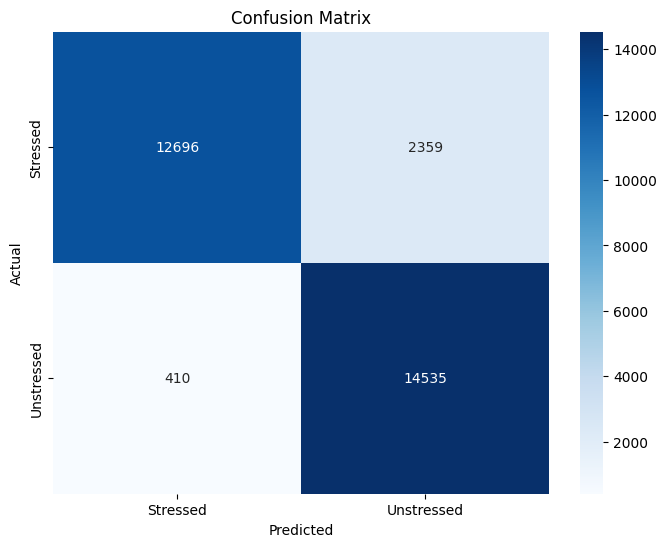

In [18]:
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

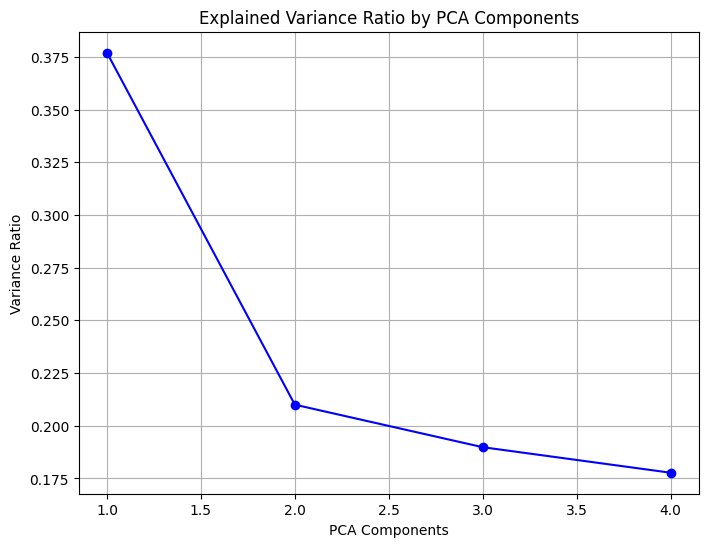

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', color='b')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Variance Ratio')
plt.grid()
plt.show()